In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import shelve
import numpy as np
import chess
from IPython.display import display, HTML, clear_output

# Get initial deterministic policies

In [3]:
def get_deterministic_policy(states):
    pi = {}
    for state, value in states.items():
        pi[state] = list(value.keys())[0]
    return pi

In [4]:
def get_deterministic_policy_uniform(states):
    pi = {}
    for state, value in states.items():
        pi[state] = np.random.choice(list(value.keys()))
    return pi

any of the too are ok

# Policy evaluation step and Policy Improve

## Option 1: Takes too long to converge

In [5]:
def deterministic_policy_eval_step_win_loss(states_actions, V, pi):
    # 
    delta = 0
    for state, actions in states_actions.items():
        action = pi[state]
        next_node = actions[action]['next_state']
        reward = actions[action]['status']
        V_updated = 0
        if next_node in V:
            V_updated = -(reward + V[next_node])
        else:
            V_updated = -reward
        delta = max(delta, np.abs(V_updated - V[state]))
        V[state] = V_updated
    return V, delta

In [6]:
def policy_improve_win_loss(V, states_actions):
    pi = {}
    for state, actions in states_actions.items():
        actions_list = [] # list(actions.keys())
        expected_rewards = [] #np.zeros(len(actions))
        for i, (action, data) in enumerate(actions.items()):
            actions_list.append(action)
            next_state = data['next_state']
            reward = data['status']
            if next_state in V:
                expected_rewards.append(-(reward + V[next_state]))
            else:
                expected_rewards.append(-reward)

        pi[state] = actions_list[np.argmax(expected_rewards)]
        if state == '4k3/8/4K2R/8/8/8/8/8 w':
            print(np.argmax(expected_rewards))
            print(actions_list)
            print(expected_rewards)
    return pi

## Option 2: Add the number of steps to the reward
Converges faster.

In Rook endgames takes 30 mins to converge

In [7]:
def deterministic_policy_eval_step_shortest_path(states_actions, V, pi, winning_reward=1e3):
    # Evaluation in place (in contrast with evaluation with 2 arrays).
    # Needs less memory and converges too
    # pi is a dict and pi[s] is the best action for that state. (The most probable action)
    delta = 0
    for state, actions in states_actions.items():
        action = pi[state]
        next_node = actions[action]['next_state']
        reward = actions[action]['status']
        V_updated = 0
        if next_node in V:
            V_updated = -(reward + V[next_node]) - np.sign(-V[next_node])
        else:
            V_updated = -reward * winning_reward
        delta = max(delta, np.abs(V_updated - V[state]))
        V[state] = V_updated
    return V, delta

In [8]:
def policy_improve_shortest_path(V, states_actions, winning_reward=1e3, verbose=1):    
    pi = {}
    for state, actions in states_actions.items():
        actions_list = [] # list(actions.keys())
        expected_rewards = [] #np.zeros(len(actions))
        for i, (action, data) in enumerate(actions.items()):
            actions_list.append(action)
            next_state = data['next_state']
            reward = data['status']
            if next_state in V:
                expected_rewards.append(-(reward + V[next_state]) - np.sign(-V[next_state]))
            else:
                expected_rewards.append(-reward * winning_reward)

        pi[state] = actions_list[np.argmax(expected_rewards)]
        if verbose==1 and state == '4k3/8/4K2R/8/8/8/8/8 w':
            fen = state + ' - - 0 1'
            board = chess.Board()
            board.set_fen(fen)
            display(board)
            print(actions_list[np.argmax(expected_rewards)])
            print(actions_list)
            print(expected_rewards)
    return pi

In [9]:
from MDP_chess import policy_iteration, policy_evaluation

# Policy Iteration Rook endgame

- policy_evaluation does multiple steps of policy_eval_step until value does function does not change more than theta
- policy_iteration does multpiple steps of policy_evaluation and policy_improve until there are no changes in policy

In [10]:
filename = './data/rook_states_tree/states'
states = shelve.open(filename, flag='r', writeback=True)
initial_pi = get_deterministic_policy(states)

In [11]:
len(states)

398780

Policy evaluation iteration number:  1 2 3 4 


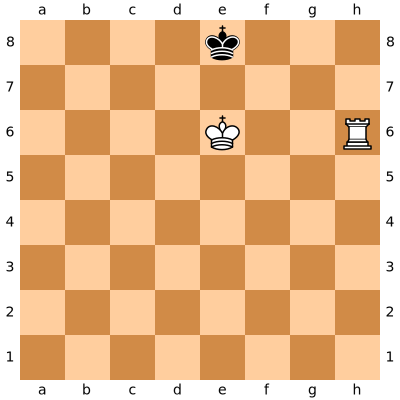

h6h8
['h6h8', 'h6h7', 'h6g6', 'h6f6', 'h6h5', 'h6h4', 'h6h3', 'h6h2', 'h6h1', 'e6f6', 'e6d6', 'e6f5', 'e6e5', 'e6d5']
[1000.0, -0.0, -0.0, 0, 0, 0, 0, 0, 0, 998.0, -0.0, -0.0, -0.0, -0.0]
Number of differences of new policy vs old policy: 3940
---------------------------
Policy evaluation iteration number:  1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 


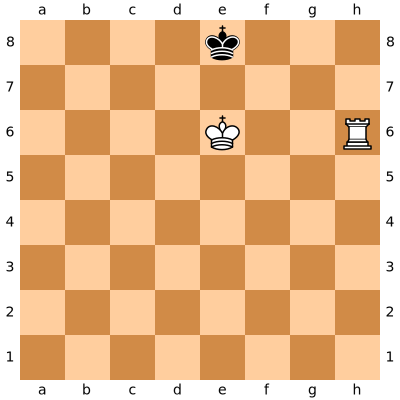

h6h8
['h6h8', 'h6h7', 'h6g6', 'h6f6', 'h6h5', 'h6h4', 'h6h3', 'h6h2', 'h6h1', 'e6f6', 'e6d6', 'e6f5', 'e6e5', 'e6d5']
[1000.0, -0.0, -0.0, 990.0, 0, 0, 0, 0, 0, 990.0, -0.0, -0.0, -0.0, -0.0]
Number of differences of new policy vs old policy: 64372
---------------------------
Policy evaluation iteration number:  1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 


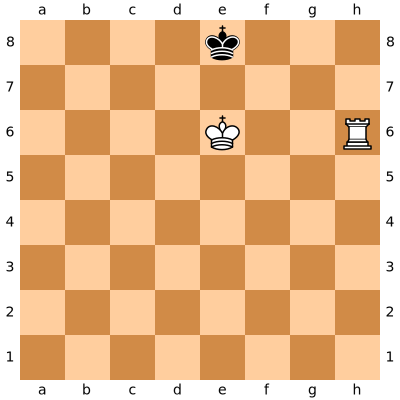

h6h8
['h6h8', 'h6h7', 'h6g6', 'h6f6', 'h6h5', 'h6h4', 'h6h3', 'h6h2', 'h6h1', 'e6f6', 'e6d6', 'e6f5', 'e6e5', 'e6d5']
[1000.0, -0.0, 996.0, 0, 996.0, 996.0, 996.0, 996.0, 996.0, 0, -0.0, 0, 0, -0.0]
Number of differences of new policy vs old policy: 151047
---------------------------
Policy evaluation iteration number:  1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 


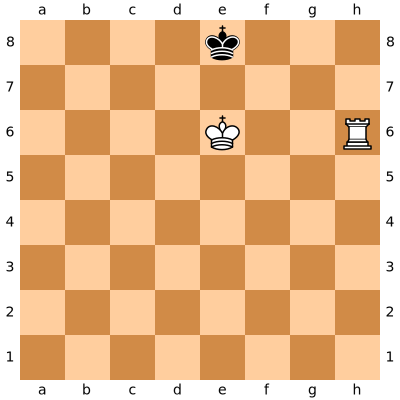

h6h8
['h6h8', 'h6h7', 'h6g6', 'h6f6', 'h6h5', 'h6h4', 'h6h3', 'h6h2', 'h6h1', 'e6f6', 'e6d6', 'e6f5', 'e6e5', 'e6d5']
[1000.0, 982.0, 976.0, 978.0, 996.0, 996.0, 996.0, 996.0, 996.0, 970.0, 988.0, 980.0, 992.0, -0.0]
Number of differences of new policy vs old policy: 212598
---------------------------
Policy evaluation iteration number:  1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 


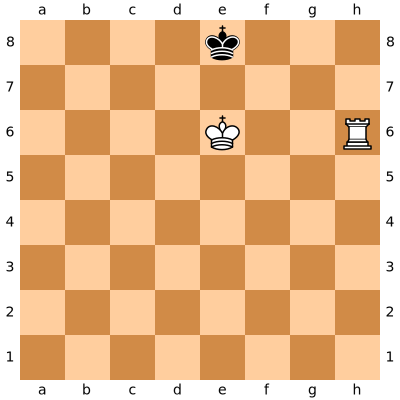

h6h8
['h6h8', 'h6h7', 'h6g6', 'h6f6', 'h6h5', 'h6h4', 'h6h3', 'h6h2', 'h6h1', 'e6f6', 'e6d6', 'e6f5', 'e6e5', 'e6d5']
[1000.0, 984.0, 0, 988.0, 996.0, 996.0, 996.0, 996.0, 996.0, 0, 0, -0.0, 0, 0]
Number of differences of new policy vs old policy: 211933
---------------------------
Policy evaluation iteration number:  1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 


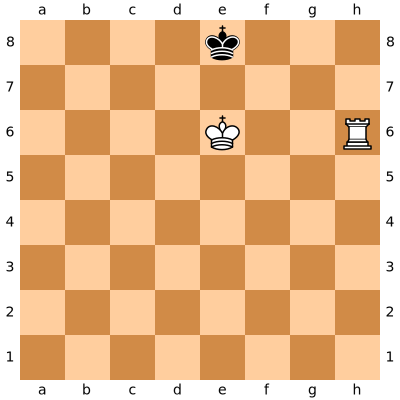

h6h8
['h6h8', 'h6h7', 'h6g6', 'h6f6', 'h6h5', 'h6h4', 'h6h3', 'h6h2', 'h6h1', 'e6f6', 'e6d6', 'e6f5', 'e6e5', 'e6d5']
[1000.0, 0, -0.0, 0, 996.0, 996.0, 996.0, 996.0, 996.0, 0, 988.0, 0, -0.0, 988.0]
Number of differences of new policy vs old policy: 171547
---------------------------
Policy evaluation iteration number:  1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 


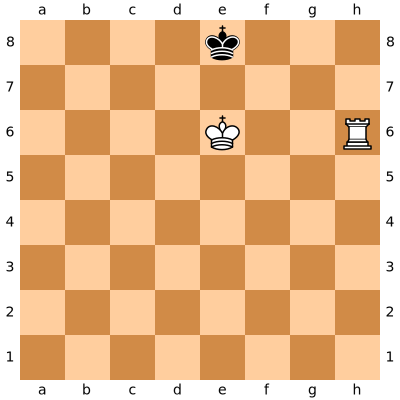

h6h8
['h6h8', 'h6h7', 'h6g6', 'h6f6', 'h6h5', 'h6h4', 'h6h3', 'h6h2', 'h6h1', 'e6f6', 'e6d6', 'e6f5', 'e6e5', 'e6d5']
[1000.0, 992.0, 0, 0, 996.0, 996.0, 996.0, 996.0, 996.0, -0.0, 0, 988.0, 0, 0]
Number of differences of new policy vs old policy: 156227
---------------------------
Policy evaluation iteration number:  1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 


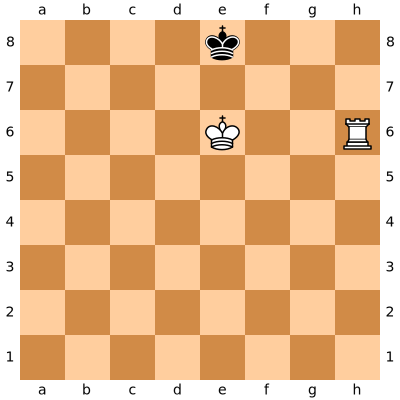

h6h8
['h6h8', 'h6h7', 'h6g6', 'h6f6', 'h6h5', 'h6h4', 'h6h3', 'h6h2', 'h6h1', 'e6f6', 'e6d6', 'e6f5', 'e6e5', 'e6d5']
[1000.0, 990.0, 990.0, 990.0, 996.0, 996.0, 996.0, 996.0, 996.0, 0, 986.0, 988.0, -0.0, 0]
Number of differences of new policy vs old policy: 181760
---------------------------
Policy evaluation iteration number:  1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 


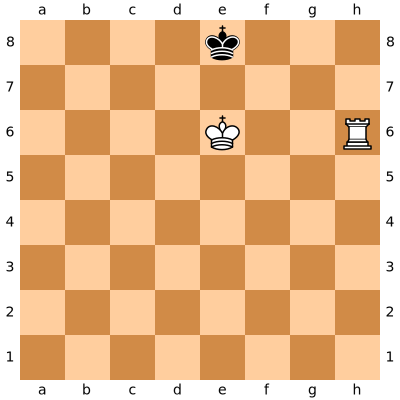

h6h8
['h6h8', 'h6h7', 'h6g6', 'h6f6', 'h6h5', 'h6h4', 'h6h3', 'h6h2', 'h6h1', 'e6f6', 'e6d6', 'e6f5', 'e6e5', 'e6d5']
[1000.0, 990.0, 990.0, 990.0, 996.0, 996.0, 996.0, 996.0, 996.0, 986.0, 986.0, 986.0, 0, 0]
Number of differences of new policy vs old policy: 205419
---------------------------
Policy evaluation iteration number:  1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 


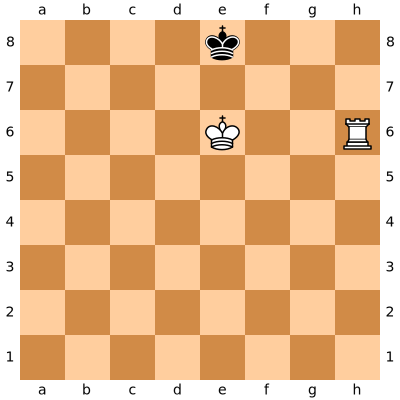

h6h8
['h6h8', 'h6h7', 'h6g6', 'h6f6', 'h6h5', 'h6h4', 'h6h3', 'h6h2', 'h6h1', 'e6f6', 'e6d6', 'e6f5', 'e6e5', 'e6d5']
[1000.0, 990.0, 990.0, 990.0, 996.0, 996.0, 996.0, 996.0, 996.0, 980.0, 986.0, 0, 984.0, 988.0]
Number of differences of new policy vs old policy: 219089
---------------------------
Policy evaluation iteration number:  1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 


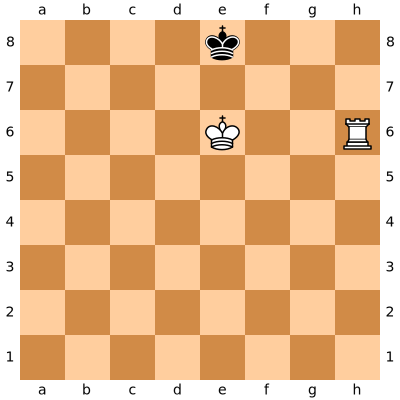

h6h8
['h6h8', 'h6h7', 'h6g6', 'h6f6', 'h6h5', 'h6h4', 'h6h3', 'h6h2', 'h6h1', 'e6f6', 'e6d6', 'e6f5', 'e6e5', 'e6d5']
[1000.0, 990.0, 990.0, 990.0, 996.0, 996.0, 996.0, 996.0, 996.0, 986.0, 986.0, 988.0, 984.0, 986.0]
Number of differences of new policy vs old policy: 218385
---------------------------
Policy evaluation iteration number:  1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 


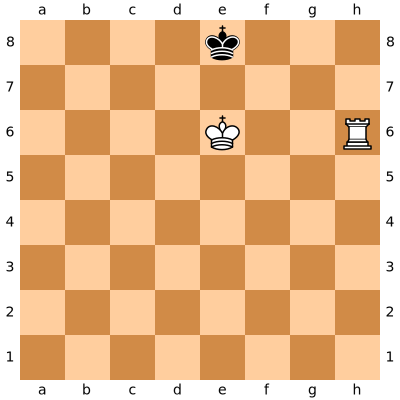

h6h8
['h6h8', 'h6h7', 'h6g6', 'h6f6', 'h6h5', 'h6h4', 'h6h3', 'h6h2', 'h6h1', 'e6f6', 'e6d6', 'e6f5', 'e6e5', 'e6d5']
[1000.0, 990.0, 990.0, 990.0, 996.0, 996.0, 996.0, 996.0, 996.0, 986.0, 986.0, 0, 0, -0.0]
Number of differences of new policy vs old policy: 201981
---------------------------
Policy evaluation iteration number:  1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 


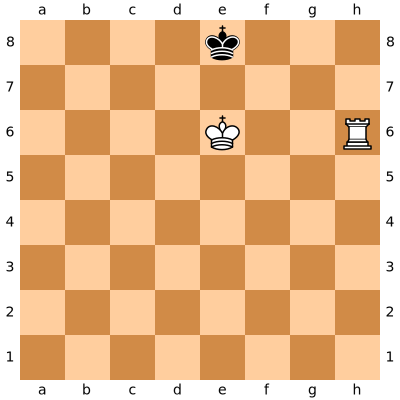

h6h8
['h6h8', 'h6h7', 'h6g6', 'h6f6', 'h6h5', 'h6h4', 'h6h3', 'h6h2', 'h6h1', 'e6f6', 'e6d6', 'e6f5', 'e6e5', 'e6d5']
[1000.0, 990.0, 990.0, 990.0, 996.0, 996.0, 996.0, 996.0, 996.0, 984.0, 986.0, 978.0, 984.0, 976.0]
Number of differences of new policy vs old policy: 195466
---------------------------
Policy evaluation iteration number:  1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 


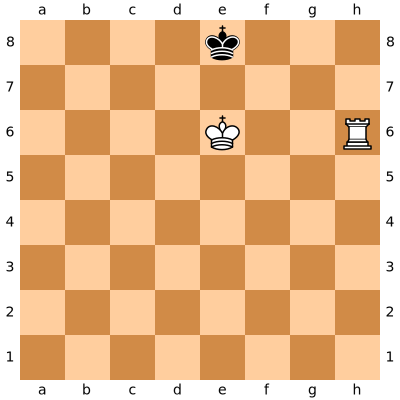

h6h8
['h6h8', 'h6h7', 'h6g6', 'h6f6', 'h6h5', 'h6h4', 'h6h3', 'h6h2', 'h6h1', 'e6f6', 'e6d6', 'e6f5', 'e6e5', 'e6d5']
[1000.0, 990.0, 990.0, 990.0, 996.0, 996.0, 996.0, 996.0, 996.0, 0, 986.0, -0.0, 0, 0]
Number of differences of new policy vs old policy: 190730
---------------------------
Policy evaluation iteration number:  1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 


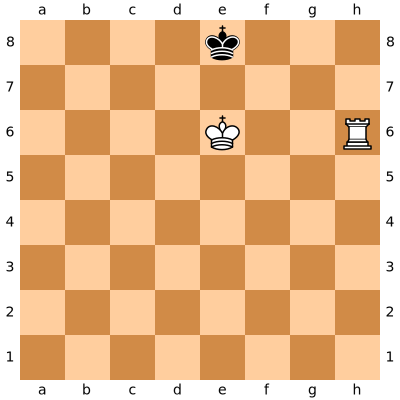

h6h8
['h6h8', 'h6h7', 'h6g6', 'h6f6', 'h6h5', 'h6h4', 'h6h3', 'h6h2', 'h6h1', 'e6f6', 'e6d6', 'e6f5', 'e6e5', 'e6d5']
[1000.0, 990.0, 990.0, 990.0, 996.0, 996.0, 996.0, 996.0, 996.0, 984.0, 986.0, 982.0, 982.0, 982.0]
Number of differences of new policy vs old policy: 178131
---------------------------
Policy evaluation iteration number:  1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 


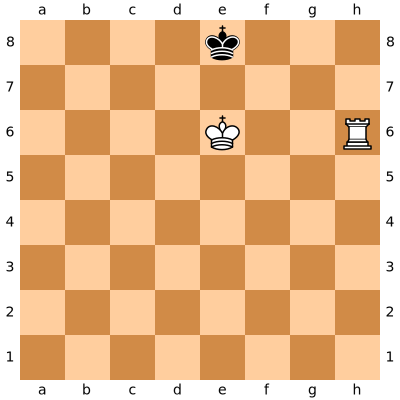

h6h8
['h6h8', 'h6h7', 'h6g6', 'h6f6', 'h6h5', 'h6h4', 'h6h3', 'h6h2', 'h6h1', 'e6f6', 'e6d6', 'e6f5', 'e6e5', 'e6d5']
[1000.0, 990.0, 990.0, 990.0, 996.0, 996.0, 996.0, 996.0, 996.0, 984.0, 986.0, 982.0, 982.0, 982.0]
Number of differences of new policy vs old policy: 163779
---------------------------
Policy evaluation iteration number:  1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 


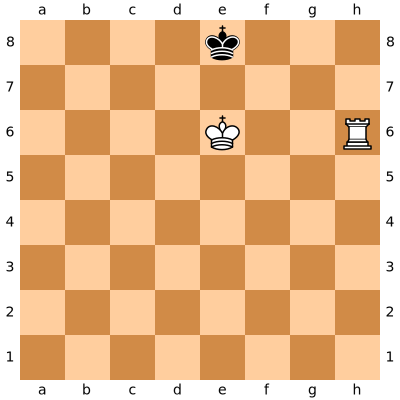

h6h8
['h6h8', 'h6h7', 'h6g6', 'h6f6', 'h6h5', 'h6h4', 'h6h3', 'h6h2', 'h6h1', 'e6f6', 'e6d6', 'e6f5', 'e6e5', 'e6d5']
[1000.0, 990.0, 990.0, 990.0, 996.0, 996.0, 996.0, 996.0, 996.0, 984.0, 986.0, 982.0, 982.0, 982.0]
Number of differences of new policy vs old policy: 153411
---------------------------
Policy evaluation iteration number:  1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 


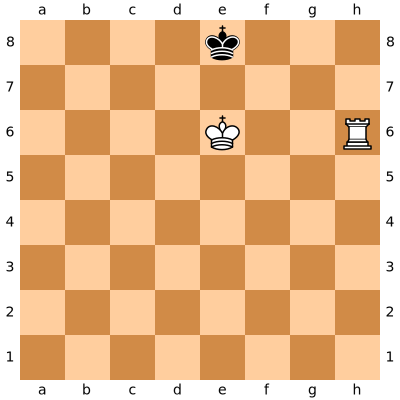

h6h8
['h6h8', 'h6h7', 'h6g6', 'h6f6', 'h6h5', 'h6h4', 'h6h3', 'h6h2', 'h6h1', 'e6f6', 'e6d6', 'e6f5', 'e6e5', 'e6d5']
[1000.0, 990.0, 990.0, 990.0, 996.0, 996.0, 996.0, 996.0, 996.0, 984.0, 986.0, 982.0, 982.0, 982.0]
Number of differences of new policy vs old policy: 138947
---------------------------
Policy evaluation iteration number:  1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 


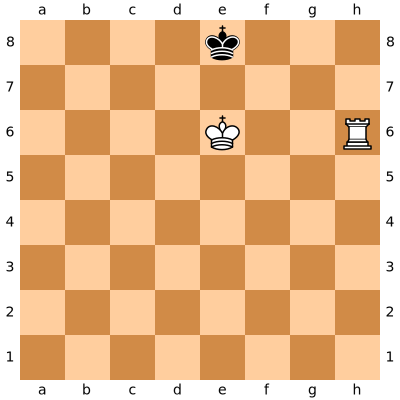

h6h8
['h6h8', 'h6h7', 'h6g6', 'h6f6', 'h6h5', 'h6h4', 'h6h3', 'h6h2', 'h6h1', 'e6f6', 'e6d6', 'e6f5', 'e6e5', 'e6d5']
[1000.0, 990.0, 990.0, 990.0, 996.0, 996.0, 996.0, 996.0, 996.0, 984.0, 986.0, 982.0, 982.0, 982.0]
Number of differences of new policy vs old policy: 129633
---------------------------
Policy evaluation iteration number:  1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 


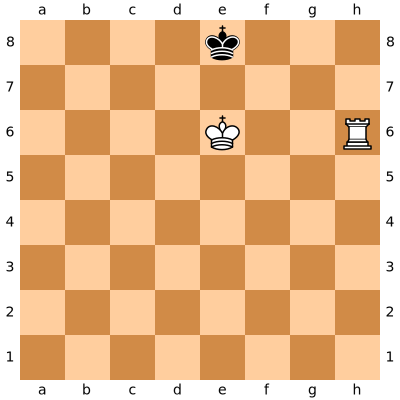

h6h8
['h6h8', 'h6h7', 'h6g6', 'h6f6', 'h6h5', 'h6h4', 'h6h3', 'h6h2', 'h6h1', 'e6f6', 'e6d6', 'e6f5', 'e6e5', 'e6d5']
[1000.0, 990.0, 990.0, 990.0, 996.0, 996.0, 996.0, 996.0, 996.0, 984.0, 986.0, 982.0, 982.0, 982.0]
Number of differences of new policy vs old policy: 114783
---------------------------
Policy evaluation iteration number:  1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 


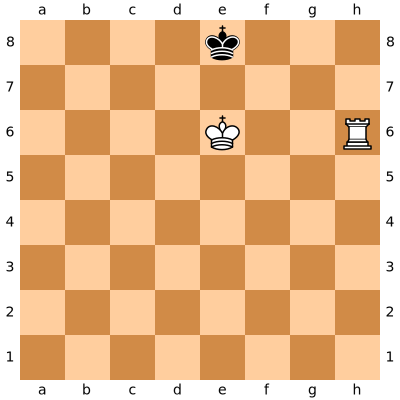

h6h8
['h6h8', 'h6h7', 'h6g6', 'h6f6', 'h6h5', 'h6h4', 'h6h3', 'h6h2', 'h6h1', 'e6f6', 'e6d6', 'e6f5', 'e6e5', 'e6d5']
[1000.0, 990.0, 990.0, 990.0, 996.0, 996.0, 996.0, 996.0, 996.0, 984.0, 986.0, 982.0, 982.0, 982.0]
Number of differences of new policy vs old policy: 102145
---------------------------
Policy evaluation iteration number:  1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 


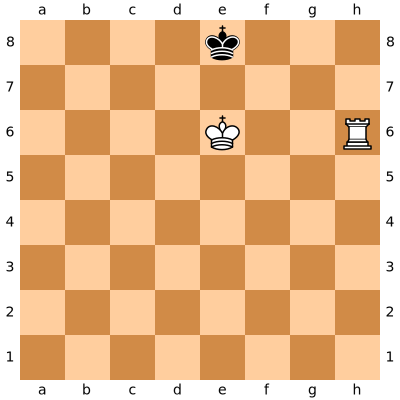

h6h8
['h6h8', 'h6h7', 'h6g6', 'h6f6', 'h6h5', 'h6h4', 'h6h3', 'h6h2', 'h6h1', 'e6f6', 'e6d6', 'e6f5', 'e6e5', 'e6d5']
[1000.0, 990.0, 990.0, 990.0, 996.0, 996.0, 996.0, 996.0, 996.0, 984.0, 986.0, 982.0, 982.0, 982.0]
Number of differences of new policy vs old policy: 86116
---------------------------
Policy evaluation iteration number:  1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 


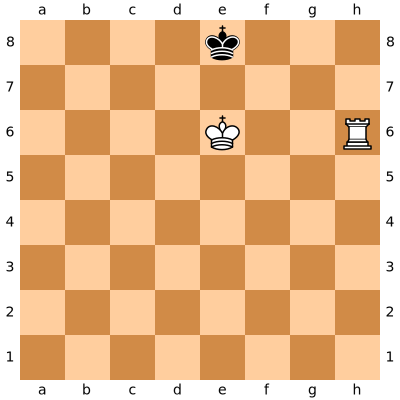

h6h8
['h6h8', 'h6h7', 'h6g6', 'h6f6', 'h6h5', 'h6h4', 'h6h3', 'h6h2', 'h6h1', 'e6f6', 'e6d6', 'e6f5', 'e6e5', 'e6d5']
[1000.0, 990.0, 990.0, 990.0, 996.0, 996.0, 996.0, 996.0, 996.0, 984.0, 986.0, 982.0, 982.0, 982.0]
Number of differences of new policy vs old policy: 71283
---------------------------
Policy evaluation iteration number:  1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 


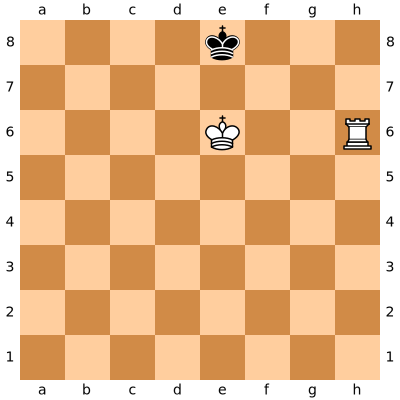

h6h8
['h6h8', 'h6h7', 'h6g6', 'h6f6', 'h6h5', 'h6h4', 'h6h3', 'h6h2', 'h6h1', 'e6f6', 'e6d6', 'e6f5', 'e6e5', 'e6d5']
[1000.0, 990.0, 990.0, 990.0, 996.0, 996.0, 996.0, 996.0, 996.0, 984.0, 986.0, 982.0, 982.0, 982.0]
Number of differences of new policy vs old policy: 55230
---------------------------
Policy evaluation iteration number:  1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 


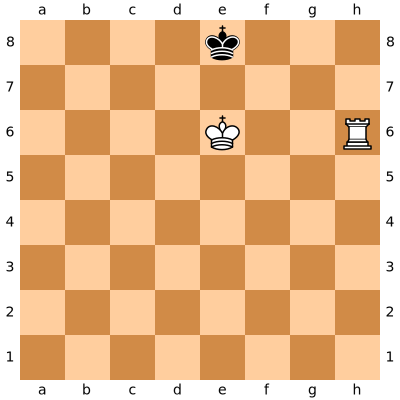

h6h8
['h6h8', 'h6h7', 'h6g6', 'h6f6', 'h6h5', 'h6h4', 'h6h3', 'h6h2', 'h6h1', 'e6f6', 'e6d6', 'e6f5', 'e6e5', 'e6d5']
[1000.0, 990.0, 990.0, 990.0, 996.0, 996.0, 996.0, 996.0, 996.0, 984.0, 986.0, 982.0, 982.0, 982.0]
Number of differences of new policy vs old policy: 39289
---------------------------
Policy evaluation iteration number:  1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 


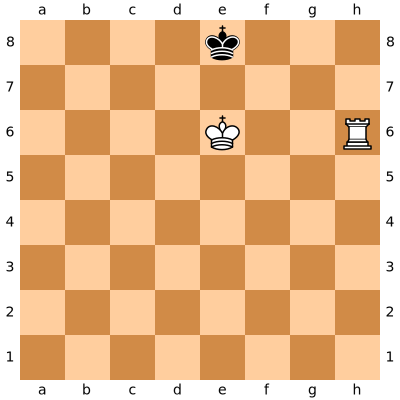

h6h8
['h6h8', 'h6h7', 'h6g6', 'h6f6', 'h6h5', 'h6h4', 'h6h3', 'h6h2', 'h6h1', 'e6f6', 'e6d6', 'e6f5', 'e6e5', 'e6d5']
[1000.0, 990.0, 990.0, 990.0, 996.0, 996.0, 996.0, 996.0, 996.0, 984.0, 986.0, 982.0, 982.0, 982.0]
Number of differences of new policy vs old policy: 23732
---------------------------
Policy evaluation iteration number:  1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 


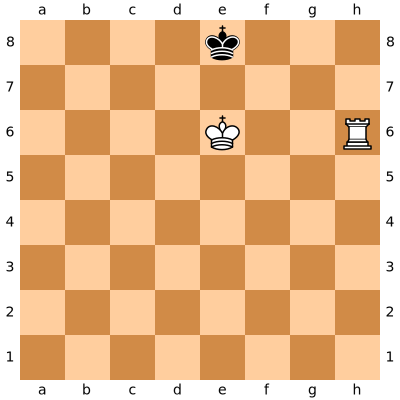

h6h8
['h6h8', 'h6h7', 'h6g6', 'h6f6', 'h6h5', 'h6h4', 'h6h3', 'h6h2', 'h6h1', 'e6f6', 'e6d6', 'e6f5', 'e6e5', 'e6d5']
[1000.0, 990.0, 990.0, 990.0, 996.0, 996.0, 996.0, 996.0, 996.0, 984.0, 986.0, 982.0, 982.0, 982.0]
Number of differences of new policy vs old policy: 13894
---------------------------
Policy evaluation iteration number:  1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 


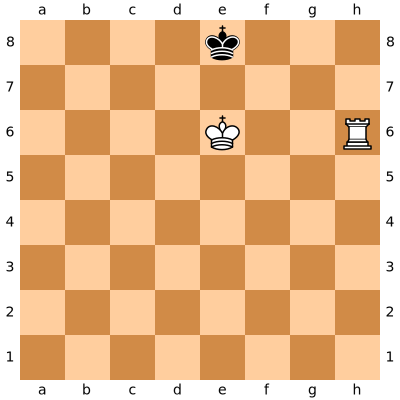

h6h8
['h6h8', 'h6h7', 'h6g6', 'h6f6', 'h6h5', 'h6h4', 'h6h3', 'h6h2', 'h6h1', 'e6f6', 'e6d6', 'e6f5', 'e6e5', 'e6d5']
[1000.0, 990.0, 990.0, 990.0, 996.0, 996.0, 996.0, 996.0, 996.0, 984.0, 986.0, 982.0, 982.0, 982.0]
Number of differences of new policy vs old policy: 5420
---------------------------
Policy evaluation iteration number:  1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 


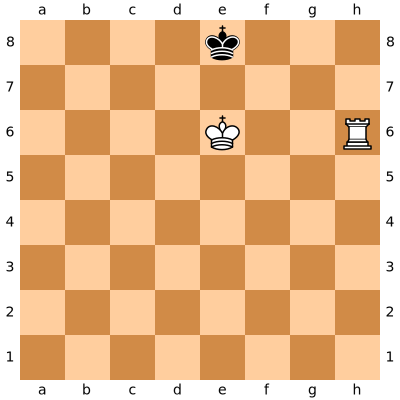

h6h8
['h6h8', 'h6h7', 'h6g6', 'h6f6', 'h6h5', 'h6h4', 'h6h3', 'h6h2', 'h6h1', 'e6f6', 'e6d6', 'e6f5', 'e6e5', 'e6d5']
[1000.0, 990.0, 990.0, 990.0, 996.0, 996.0, 996.0, 996.0, 996.0, 984.0, 986.0, 982.0, 982.0, 982.0]
Number of differences of new policy vs old policy: 2576
---------------------------
Policy evaluation iteration number:  1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 


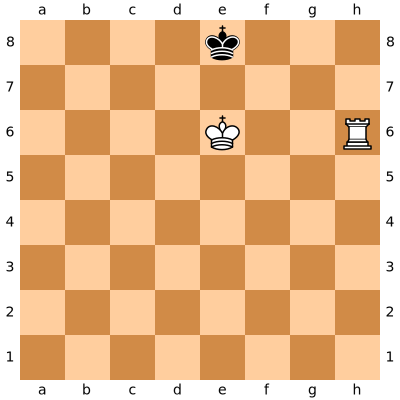

h6h8
['h6h8', 'h6h7', 'h6g6', 'h6f6', 'h6h5', 'h6h4', 'h6h3', 'h6h2', 'h6h1', 'e6f6', 'e6d6', 'e6f5', 'e6e5', 'e6d5']
[1000.0, 990.0, 990.0, 990.0, 996.0, 996.0, 996.0, 996.0, 996.0, 984.0, 986.0, 982.0, 982.0, 982.0]
Number of differences of new policy vs old policy: 483
---------------------------
Policy evaluation iteration number:  1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 


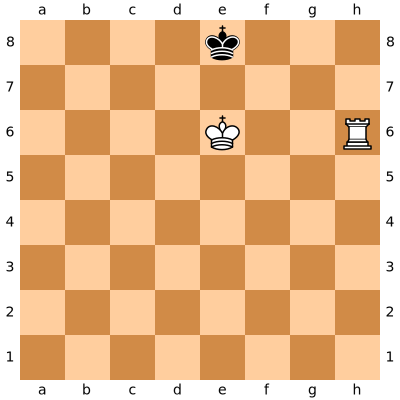

h6h8
['h6h8', 'h6h7', 'h6g6', 'h6f6', 'h6h5', 'h6h4', 'h6h3', 'h6h2', 'h6h1', 'e6f6', 'e6d6', 'e6f5', 'e6e5', 'e6d5']
[1000.0, 990.0, 990.0, 990.0, 996.0, 996.0, 996.0, 996.0, 996.0, 984.0, 986.0, 982.0, 982.0, 982.0]
Number of differences of new policy vs old policy: 204
---------------------------
Policy evaluation iteration number:  1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 


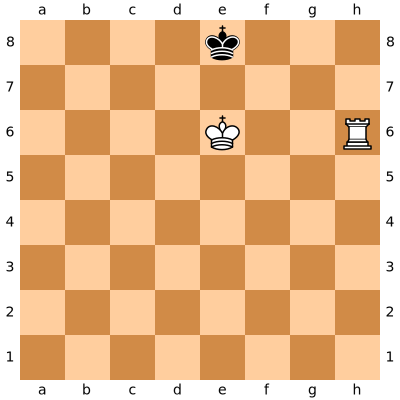

h6h8
['h6h8', 'h6h7', 'h6g6', 'h6f6', 'h6h5', 'h6h4', 'h6h3', 'h6h2', 'h6h1', 'e6f6', 'e6d6', 'e6f5', 'e6e5', 'e6d5']
[1000.0, 990.0, 990.0, 990.0, 996.0, 996.0, 996.0, 996.0, 996.0, 984.0, 986.0, 982.0, 982.0, 982.0]
Number of differences of new policy vs old policy: 0
---------------------------
CPU times: user 31min 23s, sys: 26.9 s, total: 31min 49s
Wall time: 31min 32s


In [12]:
# CPU times: user 31min 23s, sys: 26.9 s, total: 31min 49s
# Wall time: 31min 32s
%time pi, V = policy_iteration(states, \
                 initial_pi, \
                 deterministic_policy_eval_step = deterministic_policy_eval_step_shortest_path, \
                 policy_improve=policy_improve_shortest_path, \
                 theta = 1e-6, \
                 verbose = 1)

In [13]:
np.save('PI_rook_endgame', pi)
np.save('V_rook_endgame', V)

# Policy Iteration Pawn endgame

In [11]:
filename = './data/pawn_states_tree/states'
states = shelve.open(filename, flag='r', writeback=True)
initial_pi = get_deterministic_policy(states)
len(states)

807232

Policy evaluation iteration number:  1 2 3 4 


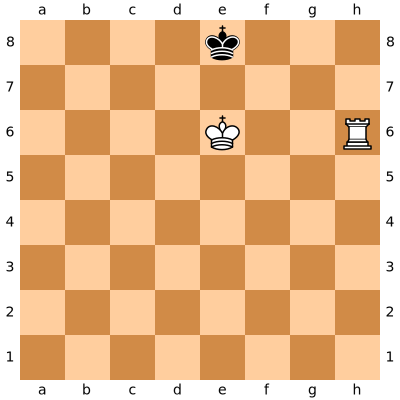

h6h8
['h6h8', 'h6h7', 'h6g6', 'h6f6', 'h6h5', 'h6h4', 'h6h3', 'h6h2', 'h6h1', 'e6f6', 'e6d6', 'e6f5', 'e6e5', 'e6d5']
[1000.0, -0.0, -0.0, 0, 0, 0, 0, 0, 0, 998.0, -0.0, -0.0, -0.0, -0.0]
Number of differences of new policy vs old policy: 8245
---------------------------
Policy evaluation iteration number:  1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 


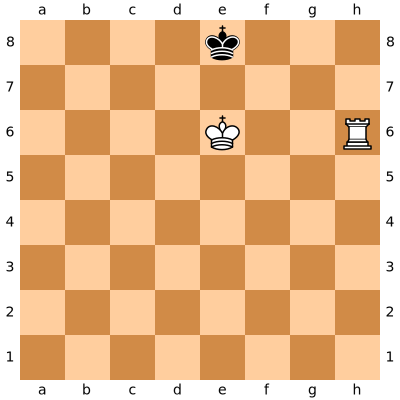

h6h8
['h6h8', 'h6h7', 'h6g6', 'h6f6', 'h6h5', 'h6h4', 'h6h3', 'h6h2', 'h6h1', 'e6f6', 'e6d6', 'e6f5', 'e6e5', 'e6d5']
[1000.0, -0.0, -0.0, 990.0, 0, 0, 0, 0, 0, 990.0, -0.0, -0.0, -0.0, -0.0]
Number of differences of new policy vs old policy: 156867
---------------------------
Policy evaluation iteration number:  1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 


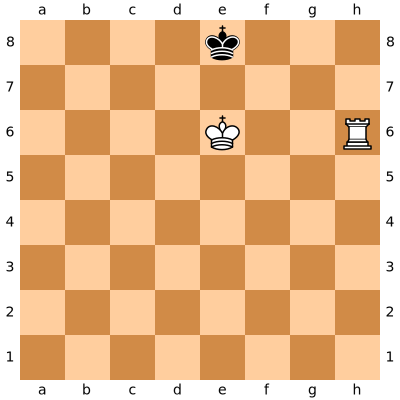

h6h8
['h6h8', 'h6h7', 'h6g6', 'h6f6', 'h6h5', 'h6h4', 'h6h3', 'h6h2', 'h6h1', 'e6f6', 'e6d6', 'e6f5', 'e6e5', 'e6d5']
[1000.0, -0.0, 996.0, 0, 996.0, 996.0, 996.0, 996.0, 996.0, 0, -0.0, 0, 0, -0.0]
Number of differences of new policy vs old policy: 325520
---------------------------
Policy evaluation iteration number:  1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 


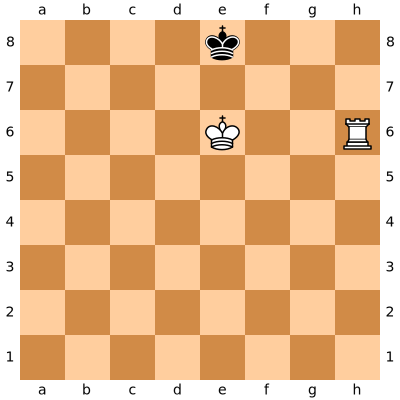

h6h8
['h6h8', 'h6h7', 'h6g6', 'h6f6', 'h6h5', 'h6h4', 'h6h3', 'h6h2', 'h6h1', 'e6f6', 'e6d6', 'e6f5', 'e6e5', 'e6d5']
[1000.0, 982.0, 976.0, 978.0, 996.0, 996.0, 996.0, 996.0, 996.0, 970.0, 988.0, 980.0, 992.0, -0.0]
Number of differences of new policy vs old policy: 431478
---------------------------
Policy evaluation iteration number:  1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 


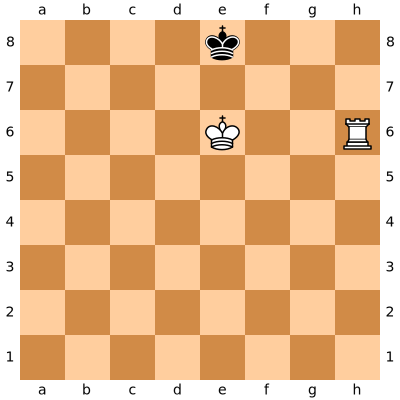

h6h8
['h6h8', 'h6h7', 'h6g6', 'h6f6', 'h6h5', 'h6h4', 'h6h3', 'h6h2', 'h6h1', 'e6f6', 'e6d6', 'e6f5', 'e6e5', 'e6d5']
[1000.0, 984.0, 0, 988.0, 996.0, 996.0, 996.0, 996.0, 996.0, 0, 0, -0.0, 0, 0]
Number of differences of new policy vs old policy: 435022
---------------------------
Policy evaluation iteration number:  1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 


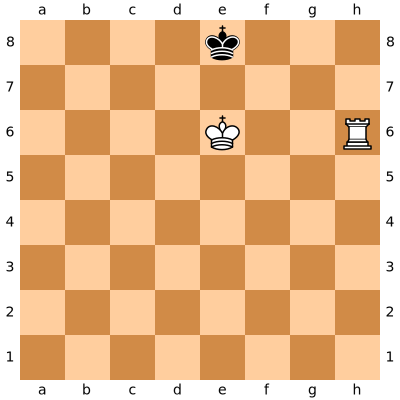

h6h8
['h6h8', 'h6h7', 'h6g6', 'h6f6', 'h6h5', 'h6h4', 'h6h3', 'h6h2', 'h6h1', 'e6f6', 'e6d6', 'e6f5', 'e6e5', 'e6d5']
[1000.0, 0, -0.0, 0, 996.0, 996.0, 996.0, 996.0, 996.0, 0, 988.0, 0, -0.0, 988.0]
Number of differences of new policy vs old policy: 382363
---------------------------
Policy evaluation iteration number:  1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 


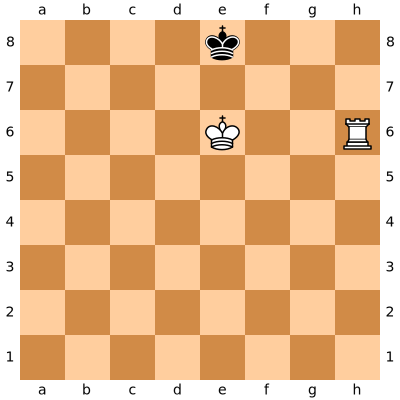

h6h8
['h6h8', 'h6h7', 'h6g6', 'h6f6', 'h6h5', 'h6h4', 'h6h3', 'h6h2', 'h6h1', 'e6f6', 'e6d6', 'e6f5', 'e6e5', 'e6d5']
[1000.0, 992.0, 0, 0, 996.0, 996.0, 996.0, 996.0, 996.0, -0.0, 0, 988.0, 0, 0]
Number of differences of new policy vs old policy: 350152
---------------------------
Policy evaluation iteration number:  1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 


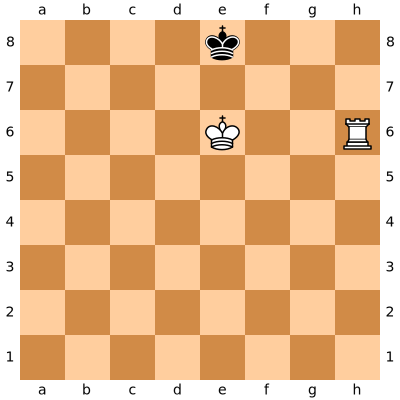

h6h8
['h6h8', 'h6h7', 'h6g6', 'h6f6', 'h6h5', 'h6h4', 'h6h3', 'h6h2', 'h6h1', 'e6f6', 'e6d6', 'e6f5', 'e6e5', 'e6d5']
[1000.0, 990.0, 990.0, 990.0, 996.0, 996.0, 996.0, 996.0, 996.0, 0, 986.0, 988.0, -0.0, 0]
Number of differences of new policy vs old policy: 355384
---------------------------
Policy evaluation iteration number:  1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 


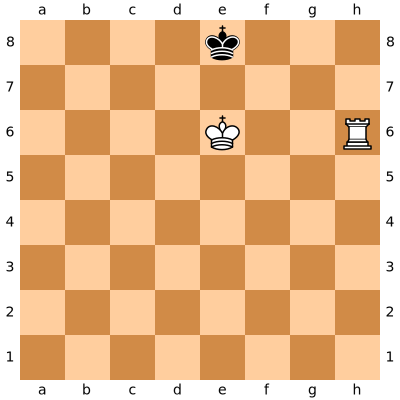

h6h8
['h6h8', 'h6h7', 'h6g6', 'h6f6', 'h6h5', 'h6h4', 'h6h3', 'h6h2', 'h6h1', 'e6f6', 'e6d6', 'e6f5', 'e6e5', 'e6d5']
[1000.0, 990.0, 990.0, 990.0, 996.0, 996.0, 996.0, 996.0, 996.0, 986.0, 986.0, 986.0, 0, 0]
Number of differences of new policy vs old policy: 357472
---------------------------
Policy evaluation iteration number:  1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 


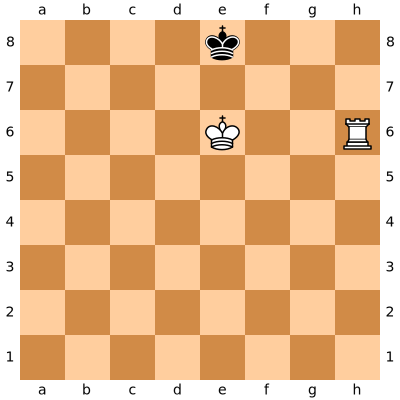

h6h8
['h6h8', 'h6h7', 'h6g6', 'h6f6', 'h6h5', 'h6h4', 'h6h3', 'h6h2', 'h6h1', 'e6f6', 'e6d6', 'e6f5', 'e6e5', 'e6d5']
[1000.0, 990.0, 990.0, 990.0, 996.0, 996.0, 996.0, 996.0, 996.0, 980.0, 986.0, 0, 984.0, 988.0]
Number of differences of new policy vs old policy: 353981
---------------------------
Policy evaluation iteration number:  1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 


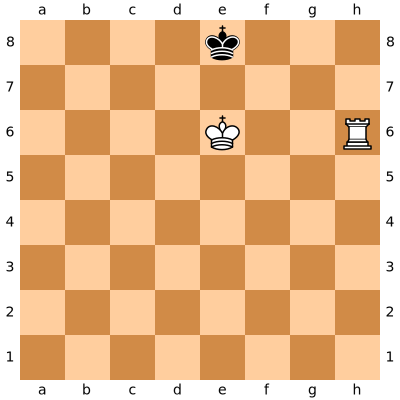

h6h8
['h6h8', 'h6h7', 'h6g6', 'h6f6', 'h6h5', 'h6h4', 'h6h3', 'h6h2', 'h6h1', 'e6f6', 'e6d6', 'e6f5', 'e6e5', 'e6d5']
[1000.0, 990.0, 990.0, 990.0, 996.0, 996.0, 996.0, 996.0, 996.0, 986.0, 986.0, 988.0, 984.0, 986.0]
Number of differences of new policy vs old policy: 326705
---------------------------
Policy evaluation iteration number:  1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 


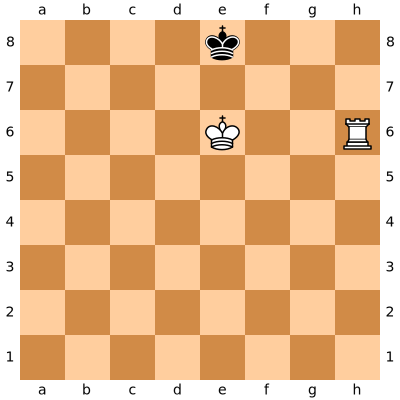

h6h8
['h6h8', 'h6h7', 'h6g6', 'h6f6', 'h6h5', 'h6h4', 'h6h3', 'h6h2', 'h6h1', 'e6f6', 'e6d6', 'e6f5', 'e6e5', 'e6d5']
[1000.0, 990.0, 990.0, 990.0, 996.0, 996.0, 996.0, 996.0, 996.0, 986.0, 986.0, 0, 0, -0.0]
Number of differences of new policy vs old policy: 288158
---------------------------
Policy evaluation iteration number:  1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 


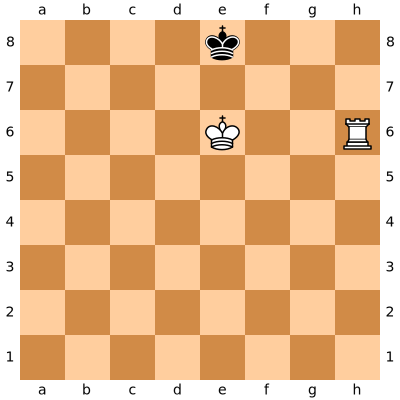

h6h8
['h6h8', 'h6h7', 'h6g6', 'h6f6', 'h6h5', 'h6h4', 'h6h3', 'h6h2', 'h6h1', 'e6f6', 'e6d6', 'e6f5', 'e6e5', 'e6d5']
[1000.0, 990.0, 990.0, 990.0, 996.0, 996.0, 996.0, 996.0, 996.0, 984.0, 986.0, 978.0, 984.0, 976.0]
Number of differences of new policy vs old policy: 257902
---------------------------
Policy evaluation iteration number:  1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 


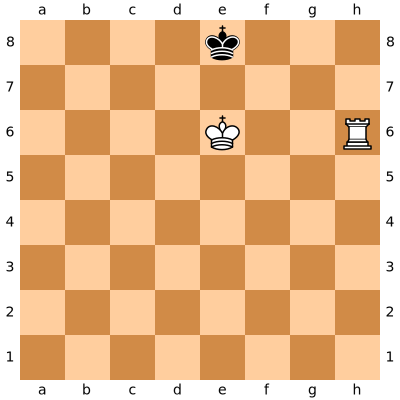

h6h8
['h6h8', 'h6h7', 'h6g6', 'h6f6', 'h6h5', 'h6h4', 'h6h3', 'h6h2', 'h6h1', 'e6f6', 'e6d6', 'e6f5', 'e6e5', 'e6d5']
[1000.0, 990.0, 990.0, 990.0, 996.0, 996.0, 996.0, 996.0, 996.0, 0, 986.0, -0.0, 0, 0]
Number of differences of new policy vs old policy: 238459
---------------------------
Policy evaluation iteration number:  1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 


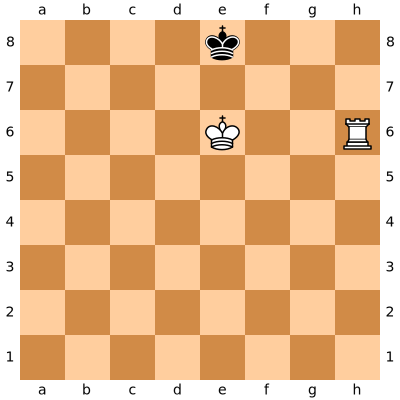

h6h8
['h6h8', 'h6h7', 'h6g6', 'h6f6', 'h6h5', 'h6h4', 'h6h3', 'h6h2', 'h6h1', 'e6f6', 'e6d6', 'e6f5', 'e6e5', 'e6d5']
[1000.0, 990.0, 990.0, 990.0, 996.0, 996.0, 996.0, 996.0, 996.0, 984.0, 986.0, 982.0, 982.0, 982.0]
Number of differences of new policy vs old policy: 206952
---------------------------
Policy evaluation iteration number:  1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 


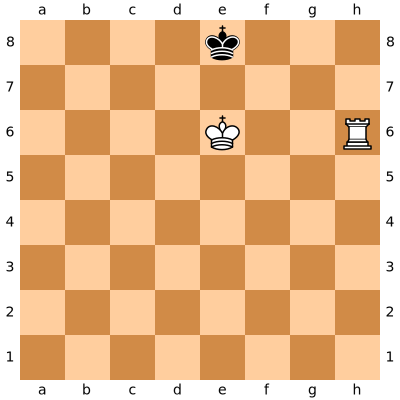

h6h8
['h6h8', 'h6h7', 'h6g6', 'h6f6', 'h6h5', 'h6h4', 'h6h3', 'h6h2', 'h6h1', 'e6f6', 'e6d6', 'e6f5', 'e6e5', 'e6d5']
[1000.0, 990.0, 990.0, 990.0, 996.0, 996.0, 996.0, 996.0, 996.0, 984.0, 986.0, 982.0, 982.0, 982.0]
Number of differences of new policy vs old policy: 185159
---------------------------
Policy evaluation iteration number:  1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 


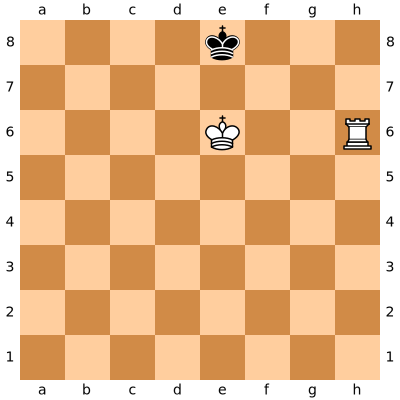

h6h8
['h6h8', 'h6h7', 'h6g6', 'h6f6', 'h6h5', 'h6h4', 'h6h3', 'h6h2', 'h6h1', 'e6f6', 'e6d6', 'e6f5', 'e6e5', 'e6d5']
[1000.0, 990.0, 990.0, 990.0, 996.0, 996.0, 996.0, 996.0, 996.0, 984.0, 986.0, 982.0, 982.0, 982.0]
Number of differences of new policy vs old policy: 168233
---------------------------
Policy evaluation iteration number:  1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 


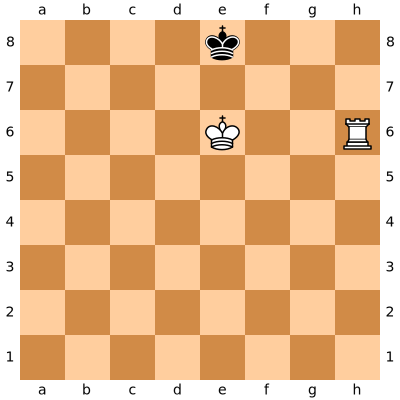

h6h8
['h6h8', 'h6h7', 'h6g6', 'h6f6', 'h6h5', 'h6h4', 'h6h3', 'h6h2', 'h6h1', 'e6f6', 'e6d6', 'e6f5', 'e6e5', 'e6d5']
[1000.0, 990.0, 990.0, 990.0, 996.0, 996.0, 996.0, 996.0, 996.0, 984.0, 986.0, 982.0, 982.0, 982.0]
Number of differences of new policy vs old policy: 151435
---------------------------
Policy evaluation iteration number:  1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 


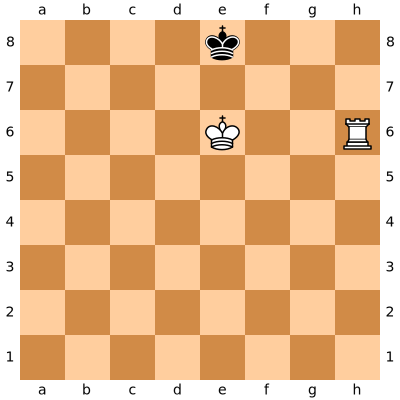

h6h8
['h6h8', 'h6h7', 'h6g6', 'h6f6', 'h6h5', 'h6h4', 'h6h3', 'h6h2', 'h6h1', 'e6f6', 'e6d6', 'e6f5', 'e6e5', 'e6d5']
[1000.0, 990.0, 990.0, 990.0, 996.0, 996.0, 996.0, 996.0, 996.0, 984.0, 986.0, 982.0, 982.0, 982.0]
Number of differences of new policy vs old policy: 140559
---------------------------
Policy evaluation iteration number:  1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 


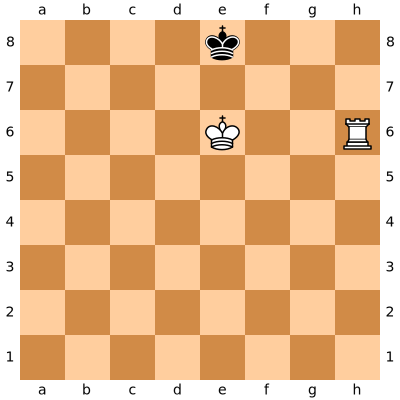

h6h8
['h6h8', 'h6h7', 'h6g6', 'h6f6', 'h6h5', 'h6h4', 'h6h3', 'h6h2', 'h6h1', 'e6f6', 'e6d6', 'e6f5', 'e6e5', 'e6d5']
[1000.0, 990.0, 990.0, 990.0, 996.0, 996.0, 996.0, 996.0, 996.0, 984.0, 986.0, 982.0, 982.0, 982.0]
Number of differences of new policy vs old policy: 125197
---------------------------
Policy evaluation iteration number:  1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 


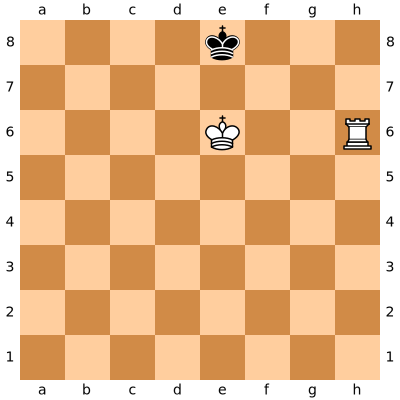

h6h8
['h6h8', 'h6h7', 'h6g6', 'h6f6', 'h6h5', 'h6h4', 'h6h3', 'h6h2', 'h6h1', 'e6f6', 'e6d6', 'e6f5', 'e6e5', 'e6d5']
[1000.0, 990.0, 990.0, 990.0, 996.0, 996.0, 996.0, 996.0, 996.0, 984.0, 986.0, 982.0, 982.0, 982.0]
Number of differences of new policy vs old policy: 111351
---------------------------
Policy evaluation iteration number:  1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 


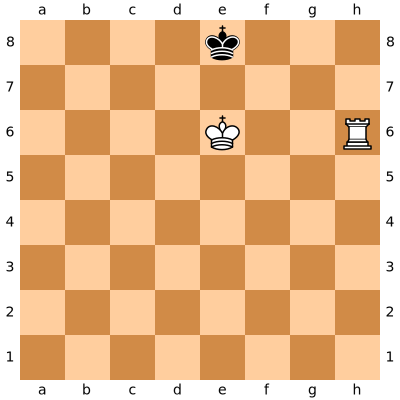

h6h8
['h6h8', 'h6h7', 'h6g6', 'h6f6', 'h6h5', 'h6h4', 'h6h3', 'h6h2', 'h6h1', 'e6f6', 'e6d6', 'e6f5', 'e6e5', 'e6d5']
[1000.0, 990.0, 990.0, 990.0, 996.0, 996.0, 996.0, 996.0, 996.0, 984.0, 986.0, 982.0, 982.0, 982.0]
Number of differences of new policy vs old policy: 94689
---------------------------
Policy evaluation iteration number:  1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 


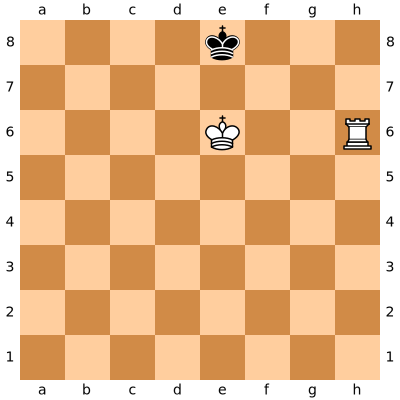

h6h8
['h6h8', 'h6h7', 'h6g6', 'h6f6', 'h6h5', 'h6h4', 'h6h3', 'h6h2', 'h6h1', 'e6f6', 'e6d6', 'e6f5', 'e6e5', 'e6d5']
[1000.0, 990.0, 990.0, 990.0, 996.0, 996.0, 996.0, 996.0, 996.0, 984.0, 986.0, 982.0, 982.0, 982.0]
Number of differences of new policy vs old policy: 78837
---------------------------
Policy evaluation iteration number:  1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 


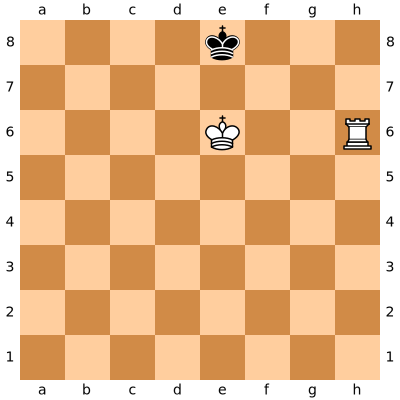

h6h8
['h6h8', 'h6h7', 'h6g6', 'h6f6', 'h6h5', 'h6h4', 'h6h3', 'h6h2', 'h6h1', 'e6f6', 'e6d6', 'e6f5', 'e6e5', 'e6d5']
[1000.0, 990.0, 990.0, 990.0, 996.0, 996.0, 996.0, 996.0, 996.0, 984.0, 986.0, 982.0, 982.0, 982.0]
Number of differences of new policy vs old policy: 63646
---------------------------
Policy evaluation iteration number:  1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 


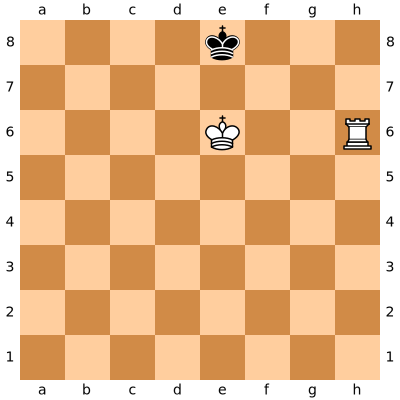

h6h8
['h6h8', 'h6h7', 'h6g6', 'h6f6', 'h6h5', 'h6h4', 'h6h3', 'h6h2', 'h6h1', 'e6f6', 'e6d6', 'e6f5', 'e6e5', 'e6d5']
[1000.0, 990.0, 990.0, 990.0, 996.0, 996.0, 996.0, 996.0, 996.0, 984.0, 986.0, 982.0, 982.0, 982.0]
Number of differences of new policy vs old policy: 46552
---------------------------
Policy evaluation iteration number:  1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 


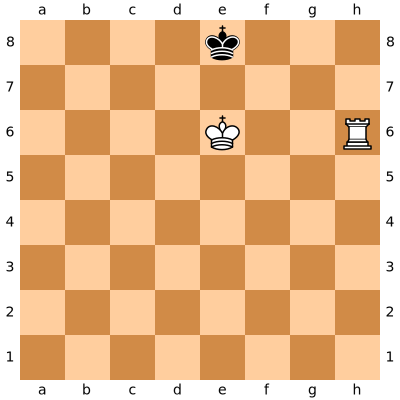

h6h8
['h6h8', 'h6h7', 'h6g6', 'h6f6', 'h6h5', 'h6h4', 'h6h3', 'h6h2', 'h6h1', 'e6f6', 'e6d6', 'e6f5', 'e6e5', 'e6d5']
[1000.0, 990.0, 990.0, 990.0, 996.0, 996.0, 996.0, 996.0, 996.0, 984.0, 986.0, 982.0, 982.0, 982.0]
Number of differences of new policy vs old policy: 29124
---------------------------
Policy evaluation iteration number:  1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 


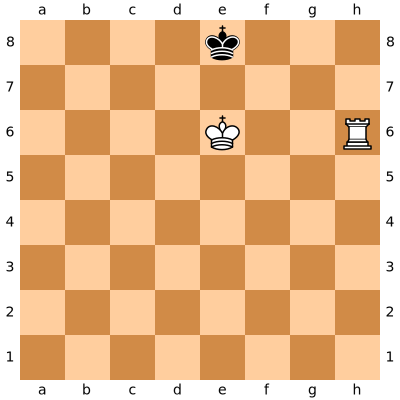

h6h8
['h6h8', 'h6h7', 'h6g6', 'h6f6', 'h6h5', 'h6h4', 'h6h3', 'h6h2', 'h6h1', 'e6f6', 'e6d6', 'e6f5', 'e6e5', 'e6d5']
[1000.0, 990.0, 990.0, 990.0, 996.0, 996.0, 996.0, 996.0, 996.0, 984.0, 986.0, 982.0, 982.0, 982.0]
Number of differences of new policy vs old policy: 18761
---------------------------
Policy evaluation iteration number:  1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 


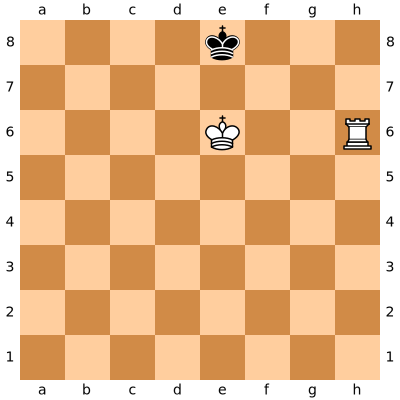

h6h8
['h6h8', 'h6h7', 'h6g6', 'h6f6', 'h6h5', 'h6h4', 'h6h3', 'h6h2', 'h6h1', 'e6f6', 'e6d6', 'e6f5', 'e6e5', 'e6d5']
[1000.0, 990.0, 990.0, 990.0, 996.0, 996.0, 996.0, 996.0, 996.0, 984.0, 986.0, 982.0, 982.0, 982.0]
Number of differences of new policy vs old policy: 10193
---------------------------
Policy evaluation iteration number:  1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 


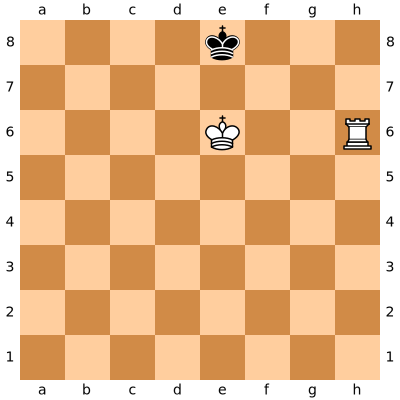

h6h8
['h6h8', 'h6h7', 'h6g6', 'h6f6', 'h6h5', 'h6h4', 'h6h3', 'h6h2', 'h6h1', 'e6f6', 'e6d6', 'e6f5', 'e6e5', 'e6d5']
[1000.0, 990.0, 990.0, 990.0, 996.0, 996.0, 996.0, 996.0, 996.0, 984.0, 986.0, 982.0, 982.0, 982.0]
Number of differences of new policy vs old policy: 7209
---------------------------
Policy evaluation iteration number:  1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 


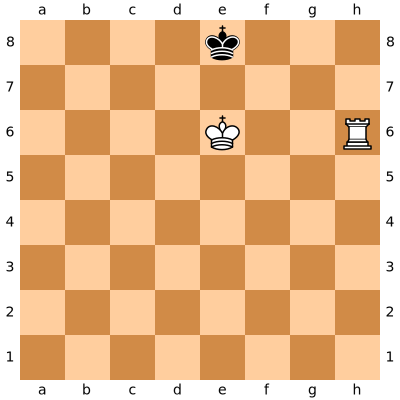

h6h8
['h6h8', 'h6h7', 'h6g6', 'h6f6', 'h6h5', 'h6h4', 'h6h3', 'h6h2', 'h6h1', 'e6f6', 'e6d6', 'e6f5', 'e6e5', 'e6d5']
[1000.0, 990.0, 990.0, 990.0, 996.0, 996.0, 996.0, 996.0, 996.0, 984.0, 986.0, 982.0, 982.0, 982.0]
Number of differences of new policy vs old policy: 4332
---------------------------
Policy evaluation iteration number:  1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 


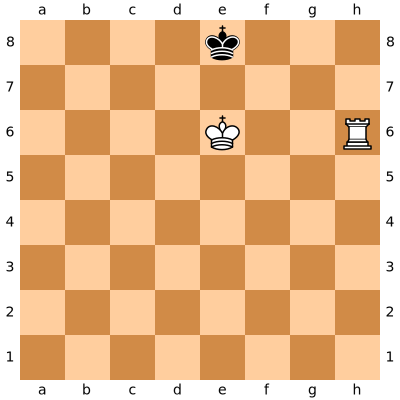

h6h8
['h6h8', 'h6h7', 'h6g6', 'h6f6', 'h6h5', 'h6h4', 'h6h3', 'h6h2', 'h6h1', 'e6f6', 'e6d6', 'e6f5', 'e6e5', 'e6d5']
[1000.0, 990.0, 990.0, 990.0, 996.0, 996.0, 996.0, 996.0, 996.0, 984.0, 986.0, 982.0, 982.0, 982.0]
Number of differences of new policy vs old policy: 2141
---------------------------
Policy evaluation iteration number:  1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 


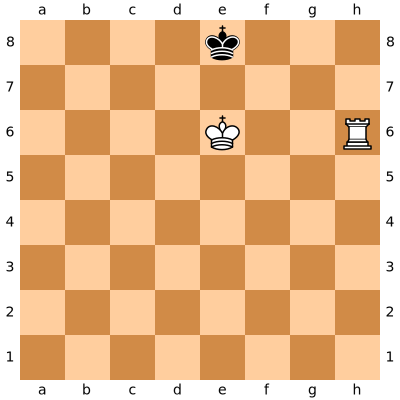

h6h8
['h6h8', 'h6h7', 'h6g6', 'h6f6', 'h6h5', 'h6h4', 'h6h3', 'h6h2', 'h6h1', 'e6f6', 'e6d6', 'e6f5', 'e6e5', 'e6d5']
[1000.0, 990.0, 990.0, 990.0, 996.0, 996.0, 996.0, 996.0, 996.0, 984.0, 986.0, 982.0, 982.0, 982.0]
Number of differences of new policy vs old policy: 2048
---------------------------
Policy evaluation iteration number:  1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 


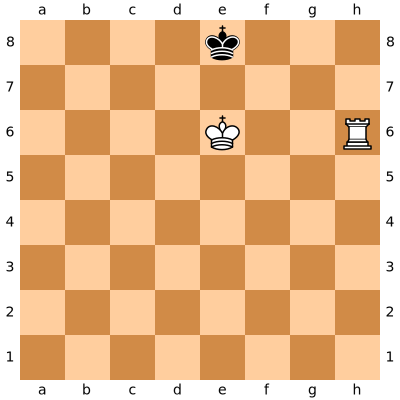

h6h8
['h6h8', 'h6h7', 'h6g6', 'h6f6', 'h6h5', 'h6h4', 'h6h3', 'h6h2', 'h6h1', 'e6f6', 'e6d6', 'e6f5', 'e6e5', 'e6d5']
[1000.0, 990.0, 990.0, 990.0, 996.0, 996.0, 996.0, 996.0, 996.0, 984.0, 986.0, 982.0, 982.0, 982.0]
Number of differences of new policy vs old policy: 1776
---------------------------
Policy evaluation iteration number:  1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 


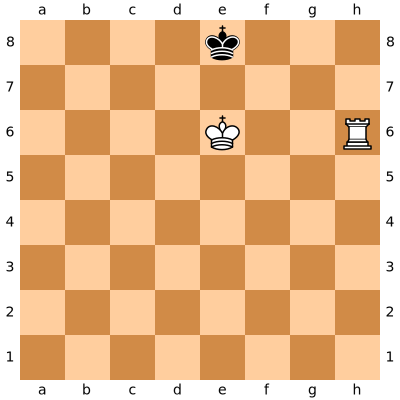

h6h8
['h6h8', 'h6h7', 'h6g6', 'h6f6', 'h6h5', 'h6h4', 'h6h3', 'h6h2', 'h6h1', 'e6f6', 'e6d6', 'e6f5', 'e6e5', 'e6d5']
[1000.0, 990.0, 990.0, 990.0, 996.0, 996.0, 996.0, 996.0, 996.0, 984.0, 986.0, 982.0, 982.0, 982.0]
Number of differences of new policy vs old policy: 1318
---------------------------
Policy evaluation iteration number:  1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 


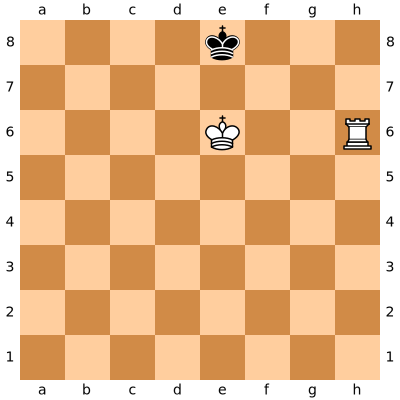

h6h8
['h6h8', 'h6h7', 'h6g6', 'h6f6', 'h6h5', 'h6h4', 'h6h3', 'h6h2', 'h6h1', 'e6f6', 'e6d6', 'e6f5', 'e6e5', 'e6d5']
[1000.0, 990.0, 990.0, 990.0, 996.0, 996.0, 996.0, 996.0, 996.0, 984.0, 986.0, 982.0, 982.0, 982.0]
Number of differences of new policy vs old policy: 733
---------------------------
Policy evaluation iteration number:  1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 


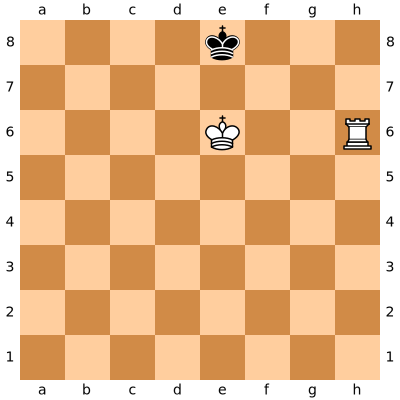

h6h8
['h6h8', 'h6h7', 'h6g6', 'h6f6', 'h6h5', 'h6h4', 'h6h3', 'h6h2', 'h6h1', 'e6f6', 'e6d6', 'e6f5', 'e6e5', 'e6d5']
[1000.0, 990.0, 990.0, 990.0, 996.0, 996.0, 996.0, 996.0, 996.0, 984.0, 986.0, 982.0, 982.0, 982.0]
Number of differences of new policy vs old policy: 163
---------------------------
Policy evaluation iteration number:  1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 


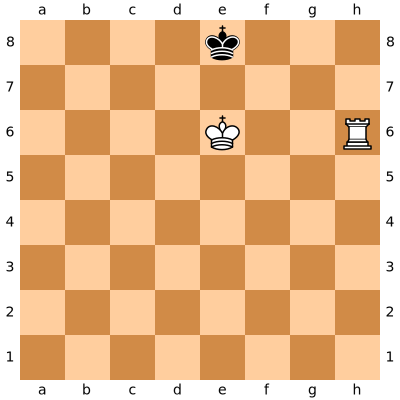

h6h8
['h6h8', 'h6h7', 'h6g6', 'h6f6', 'h6h5', 'h6h4', 'h6h3', 'h6h2', 'h6h1', 'e6f6', 'e6d6', 'e6f5', 'e6e5', 'e6d5']
[1000.0, 990.0, 990.0, 990.0, 996.0, 996.0, 996.0, 996.0, 996.0, 984.0, 986.0, 982.0, 982.0, 982.0]
Number of differences of new policy vs old policy: 36
---------------------------
Policy evaluation iteration number:  1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 


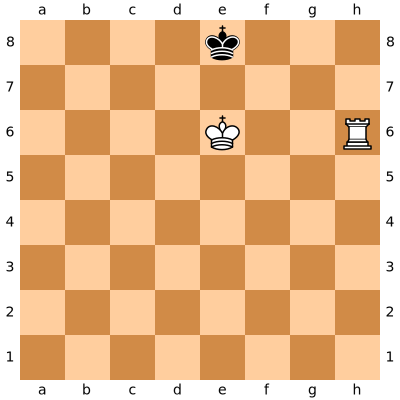

h6h8
['h6h8', 'h6h7', 'h6g6', 'h6f6', 'h6h5', 'h6h4', 'h6h3', 'h6h2', 'h6h1', 'e6f6', 'e6d6', 'e6f5', 'e6e5', 'e6d5']
[1000.0, 990.0, 990.0, 990.0, 996.0, 996.0, 996.0, 996.0, 996.0, 984.0, 986.0, 982.0, 982.0, 982.0]
Number of differences of new policy vs old policy: 0
---------------------------
CPU times: user 1h 31min 51s, sys: 46.9 s, total: 1h 32min 38s
Wall time: 1h 32min 10s


In [12]:
# CPU times: user 1h 31min 51s, sys: 46.9 s, total: 1h 32min 38s
# Wall time: 1h 32min 10s

%time pi, V = policy_iteration(states, \
                 initial_pi, \
                 deterministic_policy_eval_step = deterministic_policy_eval_step_shortest_path, \
                 policy_improve=policy_improve_shortest_path, \
                 theta = 1e-6, \
                 verbose = 1)

In [13]:
np.save('PI_pawn_endgame_pol_it', pi)
np.save('V_pawn_endgame_pol_it', V)

# Two bishops

In [ ]:
filename = './data/two_bishops/states'
states = shelve.open(filename, flag='r', writeback=True)
initial_pi = get_deterministic_policy(states)
len(states)

In [ ]:
# CPU times: user 31min 23s, sys: 26.9 s, total: 31min 49s
# Wall time: 31min 32s
%time pi, V = policy_iteration(states, \
                 initial_pi, \
                 deterministic_policy_eval_step = deterministic_policy_eval_step_shortest_path, \
                 policy_improve=policy_improve_shortest_path, \
                 theta = 1e-6, \
                 verbose = 1)

In [ ]:
np.save('PI_pawn_endgame_pol_it', pi)
np.save('V_pawn_endgame_pol_it', V)